# Aims

- build basic model as feasability for classification prediction of bad days in ED

# Objectives

- import data already processed using feature tools
- add in target feature: worst days of occupancy
- create df with roughly same variables as before
- run model
- incrementally change features that we are using
- add in rolling % calc for certain features

# Intentions
- build pipelines for data integration
- export as much of the heavy functions to seperate .py files


In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

# %load_ext autoreload
# %autoreload 2

#import mlxtend

# get data

In [129]:
# target_class = pd.read_pickle('./../target_feature_df.pkl')
target_class = pd.read_pickle('./../occ_target/EDooc_class.pkl')

In [130]:
# pickle_names = []
cal = pd.read_pickle('./../../../3_Data/EDclassification/processed/callender.pkl')

EDmorn = pd.read_pickle('./../../../3_Data/EDclassification/processed/EDmorn.pkl')

EDpd = pd.read_pickle('./../../../3_Data/EDclassification/processed/EDprevday.pkl')

IPoccperc = pd.read_pickle('./../feature_creation/IPocc_perc.pkl')

IP = pd.read_pickle('./../../../3_Data/EDclassification/processed/IPprevday.pkl')

In [131]:
cal.shape

(2099, 4)

In [132]:
EDmorn.shape

(2830, 13)

In [133]:
EDpd.shape

(2099, 13)

In [134]:
IP.shape

(2096, 65)

In [137]:
IP.index.max()

Timestamp('2018-07-30 00:00:00', freq='D')

merge all dfs to one

In [24]:
feature_dfs = [cal,EDmorn,EDpd,IPoccperc,IP]

fm = feature_dfs[0]
for df in feature_dfs[1:]:
    fm = fm.merge(df, right_index=True, left_index=True)

In [25]:
fm.head(1)

,callender_DAY(first_EDatt_time),callender_MONTH(first_EDatt_time),callender_YEAR(first_EDatt_time),callender_WEEKEND(first_EDatt_time),EDmorn_COUNT(EDatt),EDmorn_MEAN(EDatt.wait_time_total),EDmorn_MEAN(EDatt.flag_specreq),EDmorn_MEAN(EDatt.age),EDmorn_MEAN(EDatt.flag_admission),EDmorn_STD(EDatt.wait_time_total),...,IPprevday_IP1_IP1_NUM_UNIQUE(link.IPadm.MONTH(discharge_date)),IPprevday_IP1_IP1_NUM_UNIQUE(link.IPadm.YEAR(admission_date)),IPprevday_IP1_IP1_NUM_UNIQUE(link.IPadm.YEAR(discharge_date)),IPprevday_IP1_IP1_MODE(link.IPadm.MODE(link.day)),IPprevday_IP1_IP1_MODE(link.IPadm.DAY(admission_date)),IPprevday_IP1_IP1_MODE(link.IPadm.DAY(discharge_date)),IPprevday_IP1_IP1_MODE(link.IPadm.MONTH(admission_date)),IPprevday_IP1_IP1_MODE(link.IPadm.MONTH(discharge_date)),IPprevday_IP1_IP1_MODE(link.IPadm.YEAR(admission_date)),IPprevday_IP1_IP1_MODE(link.IPadm.YEAR(discharge_date))
2013-01-02,2,1,2013,False,24,104.916667,0.833333,45.25,0.166667,51.839715,...,5,2,1,2013-01-01,31,2,12,1,2012,2013


In [26]:
fm.tail(2)

,callender_DAY(first_EDatt_time),callender_MONTH(first_EDatt_time),callender_YEAR(first_EDatt_time),callender_WEEKEND(first_EDatt_time),EDmorn_COUNT(EDatt),EDmorn_MEAN(EDatt.wait_time_total),EDmorn_MEAN(EDatt.flag_specreq),EDmorn_MEAN(EDatt.age),EDmorn_MEAN(EDatt.flag_admission),EDmorn_STD(EDatt.wait_time_total),...,IPprevday_IP1_IP1_NUM_UNIQUE(link.IPadm.MONTH(discharge_date)),IPprevday_IP1_IP1_NUM_UNIQUE(link.IPadm.YEAR(admission_date)),IPprevday_IP1_IP1_NUM_UNIQUE(link.IPadm.YEAR(discharge_date)),IPprevday_IP1_IP1_MODE(link.IPadm.MODE(link.day)),IPprevday_IP1_IP1_MODE(link.IPadm.DAY(admission_date)),IPprevday_IP1_IP1_MODE(link.IPadm.DAY(discharge_date)),IPprevday_IP1_IP1_MODE(link.IPadm.MONTH(admission_date)),IPprevday_IP1_IP1_MODE(link.IPadm.MONTH(discharge_date)),IPprevday_IP1_IP1_MODE(link.IPadm.YEAR(admission_date)),IPprevday_IP1_IP1_MODE(link.IPadm.YEAR(discharge_date))
2018-08-08,8,8,2018,False,32,185.923077,0.692308,46.718750,0.307692,114.622178,...,3,2,1,2018-08-07,6,7,8,8,2018,2018
2018-08-09,9,8,2018,False,27,172.333333,0.866667,46.111111,0.133333,72.979123,...,3,2,1,2018-08-08,8,8,8,8,2018,2018


get day of week

In [27]:
fm['date'] = fm.index
fm['dayofweek'] = fm.apply(lambda x : x.date.dayofweek ,axis =1 )
fm = fm.drop('date',axis=1)

In [35]:
fm.head()

,callender_DAY(first_EDatt_time),callender_MONTH(first_EDatt_time),callender_YEAR(first_EDatt_time),callender_WEEKEND(first_EDatt_time),EDmorn_COUNT(EDatt),EDmorn_MEAN(EDatt.wait_time_total),EDmorn_MEAN(EDatt.flag_specreq),EDmorn_MEAN(EDatt.age),EDmorn_MEAN(EDatt.flag_admission),EDmorn_STD(EDatt.wait_time_total),...,IPprevday_IP1_IP1_NUM_UNIQUE(link.IPadm.YEAR(admission_date)),IPprevday_IP1_IP1_NUM_UNIQUE(link.IPadm.YEAR(discharge_date)),IPprevday_IP1_IP1_MODE(link.IPadm.MODE(link.day)),IPprevday_IP1_IP1_MODE(link.IPadm.DAY(admission_date)),IPprevday_IP1_IP1_MODE(link.IPadm.DAY(discharge_date)),IPprevday_IP1_IP1_MODE(link.IPadm.MONTH(admission_date)),IPprevday_IP1_IP1_MODE(link.IPadm.MONTH(discharge_date)),IPprevday_IP1_IP1_MODE(link.IPadm.YEAR(admission_date)),IPprevday_IP1_IP1_MODE(link.IPadm.YEAR(discharge_date)),dayofweek
2013-01-02,2,1,2013,False,24,104.916667,0.833333,45.250000,0.166667,51.839715,...,2,1,2013-01-01,31,2,12,1,2012,2013,2
2013-01-03,3,1,2013,False,32,157.272727,0.727273,50.781250,0.272727,72.372772,...,2,1,2013-01-02,2,3,12,1,2012,2013,3
2013-01-04,4,1,2013,False,31,176.916667,0.666667,36.645161,0.375000,65.250632,...,2,1,2013-01-03,2,3,12,1,2012,2013,4
2013-01-05,5,1,2013,True,30,160.217391,0.695652,39.866667,0.347826,87.252484,...,2,1,2013-01-04,3,4,12,1,2012,2013,5
2013-01-06,6,1,2013,True,41,171.045455,0.590909,46.682927,0.454545,103.064694,...,2,1,2013-01-05,4,7,12,1,2012,2013,6


# drop pointless features

In [31]:
def find_columns_single_value(df):
    "takes df. returns list of columns names which contain all the same value."
    cols_to_drop = []
    for col in df.columns:
        col_values_list = df[col].unique()
        if len(col_values_list) == 1:
            cols_to_drop.append(col)
    return(cols_to_drop)

single_names = find_columns_single_value(fm)
print(single_names)
fm = fm.drop(single_names,axis=1)

[]


In [34]:
from utils import find_duplicate_column_names

dup_names = find_duplicate_column_names(fm)
dup_names

[]

# combine features and target

In [36]:
target_class.shape

(2465, 2)

In [37]:
target_class.head(2)

,EDocc,flag_target
dt_date,,
2012-01-01,55.750000,1
2012-01-02,38.541667,0


add label

In [38]:
df = pd.DataFrame(target_class['flag_target']).merge(fm,right_index=True, left_index=True)

 note this is possiblr MEAN not max: htink the target is mean

In [39]:
EDocc_MAX_prevday = pd.DataFrame(target_class['EDocc']).rename(columns={'EDocc':'EDoccMAX_prevday'})

In [40]:
EDocc_MAX_prevday.index = EDocc_MAX_prevday.index.shift(1,'d')

In [41]:
df = EDocc_MAX_prevday.merge(df,right_index=True, left_index=True)

In [42]:
df.head(1)

,EDoccMAX_prevday,flag_target,callender_DAY(first_EDatt_time),callender_MONTH(first_EDatt_time),callender_YEAR(first_EDatt_time),callender_WEEKEND(first_EDatt_time),EDmorn_COUNT(EDatt),EDmorn_MEAN(EDatt.wait_time_total),EDmorn_MEAN(EDatt.flag_specreq),EDmorn_MEAN(EDatt.age),...,IPprevday_IP1_IP1_NUM_UNIQUE(link.IPadm.YEAR(admission_date)),IPprevday_IP1_IP1_NUM_UNIQUE(link.IPadm.YEAR(discharge_date)),IPprevday_IP1_IP1_MODE(link.IPadm.MODE(link.day)),IPprevday_IP1_IP1_MODE(link.IPadm.DAY(admission_date)),IPprevday_IP1_IP1_MODE(link.IPadm.DAY(discharge_date)),IPprevday_IP1_IP1_MODE(link.IPadm.MONTH(admission_date)),IPprevday_IP1_IP1_MODE(link.IPadm.MONTH(discharge_date)),IPprevday_IP1_IP1_MODE(link.IPadm.YEAR(admission_date)),IPprevday_IP1_IP1_MODE(link.IPadm.YEAR(discharge_date)),dayofweek
2013-01-02,43.583333,0,2,1,2013,False,24,104.916667,0.833333,45.25,...,2,1,2013-01-01,31,2,12,1,2012,2013,2


In [43]:
df.shape

(2046, 86)

# Engineer additional features

Proportion of(non-elec / elec +non-elec )IP occupancy at final hour of day.

df['IPocc_ratio_LAST'] = df['LAST(hourly.IPocc_NonElective)']/df['LAST(hourly.IPocc_elec_nonelec)']

df.IPocc_ratio_LAST.plot()

IPocc percenrtage

interval = 90
df['MAX(hourly.IPocc_elec_nonelec)'].plot(figsize=(16,4))
df['MAX(hourly.IPocc_elec_nonelec)'].rolling(interval).mean().plot()
df['MAX(hourly.IPocc_elec_nonelec)'].rolling(interval).max().plot()

df['IPbed_cap_synth'] = df['MAX(hourly.IPocc_elec_nonelec)'].rolling(interval).max()

df['IPbed_occupancy'] = df['MAX(hourly.IPocc_elec_nonelec)']/df.IPbed_cap_synth

adm - dis IP

df['IPadm_minus_dis_elec_nonelec'] = df['SUM(hourly.IPadm_elec_nonelec)'] - df['SUM(hourly.IPdis_elec_nonelec)']

# Make lagged features & offset target feature

- lagged features
- target feature moved forward by 1 day

from utils import LaggedFeaturesAll, OffsetTargetVar

feature_changes = {'lag':[1,2,3,4,5,6,7],
                  'sum':[7],
                  'mean':[7,30]}


target_changes = {'flag_target':[1]}

# create piptleine to create lags in data
feature_prep = Pipeline([
   # ('LaggedFeature',LaggedFeaturesAll(feature_changes,num_attribs)),
    ('OffsetTarget',OffsetTargetVar(target_changes)),
])

feature_prep.fit_transform(df)
df.dropna(inplace=True)

# pipeline for data prep

#### get data into x,y, test,train

In [44]:
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline

In [45]:
df.head(1)

,EDoccMAX_prevday,flag_target,callender_DAY(first_EDatt_time),callender_MONTH(first_EDatt_time),callender_YEAR(first_EDatt_time),callender_WEEKEND(first_EDatt_time),EDmorn_COUNT(EDatt),EDmorn_MEAN(EDatt.wait_time_total),EDmorn_MEAN(EDatt.flag_specreq),EDmorn_MEAN(EDatt.age),...,IPprevday_IP1_IP1_NUM_UNIQUE(link.IPadm.YEAR(admission_date)),IPprevday_IP1_IP1_NUM_UNIQUE(link.IPadm.YEAR(discharge_date)),IPprevday_IP1_IP1_MODE(link.IPadm.MODE(link.day)),IPprevday_IP1_IP1_MODE(link.IPadm.DAY(admission_date)),IPprevday_IP1_IP1_MODE(link.IPadm.DAY(discharge_date)),IPprevday_IP1_IP1_MODE(link.IPadm.MONTH(admission_date)),IPprevday_IP1_IP1_MODE(link.IPadm.MONTH(discharge_date)),IPprevday_IP1_IP1_MODE(link.IPadm.YEAR(admission_date)),IPprevday_IP1_IP1_MODE(link.IPadm.YEAR(discharge_date)),dayofweek
2013-01-02,43.583333,0,2,1,2013,False,24,104.916667,0.833333,45.25,...,2,1,2013-01-01,31,2,12,1,2012,2013,2


In [46]:
target_col = 'flag_target'

df.drop('EDocc',axis=1,inplace=True) # drop column with continuous target variable in !

In [47]:
df.reset_index(inplace=True, drop=True) #.rename(columns={'index':'date'})

In [49]:
from utils import make_test_train_splits

X_test,X_valid,X_train,X_train_valid,y_test,y_valid,y_train,y_train_valid = make_test_train_splits(df,target_col,'flag_target',365,0)

DATA POINTS:
training:  1681
validation:  0
testing:  365


#### pipeline: feature selection and scaling

drop cols wiht duplicate values

from utils import find_duplicate_column_names

dup_names = find_duplicate_column_names(df)

df.drop(dup_names,axis=1,inplace=True)

df.shape

drop columns that have high proportion of missing values - unfinished

df.isnull().sum()[(df.isnull().sum()/df.shape[0]) > 0.1]

drop all mentions of month, weekday, 

In [50]:
#### a sklearn transformer class to select attributes of interest for each group
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator,TransformerMixin):
    def __init__(self,attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self,X):
        return X[self.attribute_names].values

In [51]:
#### a sklearn transformer class to select attributes of interest for each group
from sklearn.base import BaseEstimator, TransformerMixin

class MakeBooleanAnInteger(BaseEstimator,TransformerMixin):
    def __init__(self):
        return
    def fit(self, X, y=None):
        return self
    def transform(self,X):
        return X*1

In [52]:
# version 19.2
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder 
#from sklearn.preprocessing import OrdinalEncoder

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

num_attribs,cat_attribs,bin_attribs,typesdf = find_feature_types(df)

In [53]:
for i in df.columns:
    print(i)

EDoccMAX_prevday
flag_target
callender_DAY(first_EDatt_time)
callender_MONTH(first_EDatt_time)
callender_YEAR(first_EDatt_time)
callender_WEEKEND(first_EDatt_time)
EDmorn_COUNT(EDatt)
EDmorn_MEAN(EDatt.wait_time_total)
EDmorn_MEAN(EDatt.flag_specreq)
EDmorn_MEAN(EDatt.age)
EDmorn_MEAN(EDatt.flag_admission)
EDmorn_STD(EDatt.wait_time_total)
EDmorn_STD(EDatt.flag_specreq)
EDmorn_STD(EDatt.age)
EDmorn_STD(EDatt.flag_admission)
EDmorn_SUM(EDatt.wait_time_total)
EDmorn_SUM(EDatt.flag_specreq)
EDmorn_SUM(EDatt.age)
EDmorn_SUM(EDatt.flag_admission)
EDprevday_COUNT(EDatt)
EDprevday_MEAN(EDatt.wait_time_total)
EDprevday_MEAN(EDatt.flag_specreq)
EDprevday_MEAN(EDatt.age)
EDprevday_MEAN(EDatt.flag_admission)
EDprevday_STD(EDatt.wait_time_total)
EDprevday_STD(EDatt.flag_specreq)
EDprevday_STD(EDatt.age)
EDprevday_STD(EDatt.flag_admission)
EDprevday_SUM(EDatt.wait_time_total)
EDprevday_SUM(EDatt.flag_specreq)
EDprevday_SUM(EDatt.age)
EDprevday_SUM(EDatt.flag_admission)
IPocc_perc
IP_admissions_elec

In [54]:
df.head()

,EDoccMAX_prevday,flag_target,callender_DAY(first_EDatt_time),callender_MONTH(first_EDatt_time),callender_YEAR(first_EDatt_time),callender_WEEKEND(first_EDatt_time),EDmorn_COUNT(EDatt),EDmorn_MEAN(EDatt.wait_time_total),EDmorn_MEAN(EDatt.flag_specreq),EDmorn_MEAN(EDatt.age),...,IPprevday_IP1_IP1_NUM_UNIQUE(link.IPadm.YEAR(admission_date)),IPprevday_IP1_IP1_NUM_UNIQUE(link.IPadm.YEAR(discharge_date)),IPprevday_IP1_IP1_MODE(link.IPadm.MODE(link.day)),IPprevday_IP1_IP1_MODE(link.IPadm.DAY(admission_date)),IPprevday_IP1_IP1_MODE(link.IPadm.DAY(discharge_date)),IPprevday_IP1_IP1_MODE(link.IPadm.MONTH(admission_date)),IPprevday_IP1_IP1_MODE(link.IPadm.MONTH(discharge_date)),IPprevday_IP1_IP1_MODE(link.IPadm.YEAR(admission_date)),IPprevday_IP1_IP1_MODE(link.IPadm.YEAR(discharge_date)),dayofweek
0,43.583333,0,2,1,2013,False,24,104.916667,0.833333,45.250000,...,2,1,2013-01-01,31,2,12,1,2012,2013,2
1,45.250000,0,3,1,2013,False,32,157.272727,0.727273,50.781250,...,2,1,2013-01-02,2,3,12,1,2012,2013,3
2,50.708333,0,4,1,2013,False,31,176.916667,0.666667,36.645161,...,2,1,2013-01-03,2,3,12,1,2012,2013,4
3,38.666667,0,5,1,2013,True,30,160.217391,0.695652,39.866667,...,2,1,2013-01-04,3,4,12,1,2012,2013,5
4,42.250000,0,6,1,2013,True,41,171.045455,0.590909,46.682927,...,2,1,2013-01-05,4,7,12,1,2012,2013,6


# manual pick of variables

In [55]:
df.shape[0]-365

1681

In [56]:
fm.columns

Index(['callender_DAY(first_EDatt_time)', 'callender_MONTH(first_EDatt_time)',
       'callender_YEAR(first_EDatt_time)',
       'callender_WEEKEND(first_EDatt_time)', 'EDmorn_COUNT(EDatt)',
       'EDmorn_MEAN(EDatt.wait_time_total)', 'EDmorn_MEAN(EDatt.flag_specreq)',
       'EDmorn_MEAN(EDatt.age)', 'EDmorn_MEAN(EDatt.flag_admission)',
       'EDmorn_STD(EDatt.wait_time_total)', 'EDmorn_STD(EDatt.flag_specreq)',
       'EDmorn_STD(EDatt.age)', 'EDmorn_STD(EDatt.flag_admission)',
       'EDmorn_SUM(EDatt.wait_time_total)', 'EDmorn_SUM(EDatt.flag_specreq)',
       'EDmorn_SUM(EDatt.age)', 'EDmorn_SUM(EDatt.flag_admission)',
       'EDprevday_COUNT(EDatt)', 'EDprevday_MEAN(EDatt.wait_time_total)',
       'EDprevday_MEAN(EDatt.flag_specreq)', 'EDprevday_MEAN(EDatt.age)',
       'EDprevday_MEAN(EDatt.flag_admission)',
       'EDprevday_STD(EDatt.wait_time_total)',
       'EDprevday_STD(EDatt.flag_specreq)', 'EDprevday_STD(EDatt.age)',
       'EDprevday_STD(EDatt.flag_admission)',
       

'MIN(hours.NUM_UNIQUE(active_visits.atten_id))',
        'MAX(hours.NUM_UNIQUE(active_visits.atten_id))',
       ,'MEAN(active_visits.EDatt.age)','SKEW(active_visits.EDatt.age)'

In [57]:
fm.head()

,callender_DAY(first_EDatt_time),callender_MONTH(first_EDatt_time),callender_YEAR(first_EDatt_time),callender_WEEKEND(first_EDatt_time),EDmorn_COUNT(EDatt),EDmorn_MEAN(EDatt.wait_time_total),EDmorn_MEAN(EDatt.flag_specreq),EDmorn_MEAN(EDatt.age),EDmorn_MEAN(EDatt.flag_admission),EDmorn_STD(EDatt.wait_time_total),...,IPprevday_IP1_IP1_NUM_UNIQUE(link.IPadm.YEAR(admission_date)),IPprevday_IP1_IP1_NUM_UNIQUE(link.IPadm.YEAR(discharge_date)),IPprevday_IP1_IP1_MODE(link.IPadm.MODE(link.day)),IPprevday_IP1_IP1_MODE(link.IPadm.DAY(admission_date)),IPprevday_IP1_IP1_MODE(link.IPadm.DAY(discharge_date)),IPprevday_IP1_IP1_MODE(link.IPadm.MONTH(admission_date)),IPprevday_IP1_IP1_MODE(link.IPadm.MONTH(discharge_date)),IPprevday_IP1_IP1_MODE(link.IPadm.YEAR(admission_date)),IPprevday_IP1_IP1_MODE(link.IPadm.YEAR(discharge_date)),dayofweek
2013-01-02,2,1,2013,False,24,104.916667,0.833333,45.250000,0.166667,51.839715,...,2,1,2013-01-01,31,2,12,1,2012,2013,2
2013-01-03,3,1,2013,False,32,157.272727,0.727273,50.781250,0.272727,72.372772,...,2,1,2013-01-02,2,3,12,1,2012,2013,3
2013-01-04,4,1,2013,False,31,176.916667,0.666667,36.645161,0.375000,65.250632,...,2,1,2013-01-03,2,3,12,1,2012,2013,4
2013-01-05,5,1,2013,True,30,160.217391,0.695652,39.866667,0.347826,87.252484,...,2,1,2013-01-04,3,4,12,1,2012,2013,5
2013-01-06,6,1,2013,True,41,171.045455,0.590909,46.682927,0.454545,103.064694,...,2,1,2013-01-05,4,7,12,1,2012,2013,6


In [58]:
num_attribs = [
'callender_YEAR(first_EDatt_time)',
'EDmorn_COUNT(EDatt)',
'EDmorn_MEAN(EDatt.wait_time_total)',
# 'EDmorn_MEAN(EDatt.flag_specreq)',
'EDmorn_MEAN(EDatt.age)',
# 'EDmorn_MEAN(EDatt.flag_admission)',
# 'EDmorn_STD(EDatt.wait_time_total)',
# 'EDmorn_STD(EDatt.flag_specreq)',
'EDmorn_STD(EDatt.age)',
# 'EDmorn_STD(EDatt.flag_admission)',
# 'EDmorn_SUM(EDatt.wait_time_total)',
'EDmorn_SUM(EDatt.flag_specreq)',
# 'EDmorn_SUM(EDatt.age)',
'EDmorn_SUM(EDatt.flag_admission)',
'EDprevday_COUNT(EDatt)',
# 'EDprevday_MEAN(EDatt.wait_time_total)',
# 'EDprevday_MEAN(EDatt.flag_specreq)',
'EDprevday_MEAN(EDatt.age)',
# 'EDprevday_MEAN(EDatt.flag_admission)',
# 'EDprevday_STD(EDatt.wait_time_total)',
# 'EDprevday_STD(EDatt.flag_specreq)',
# 'EDprevday_STD(EDatt.age)',
# 'EDprevday_STD(EDatt.flag_admission)',
# 'EDprevday_SUM(EDatt.wait_time_total)',
# 'EDprevday_SUM(EDatt.flag_specreq)',
# 'EDprevday_SUM(EDatt.age)',
'EDprevday_SUM(EDatt.flag_admission)',
'IPocc_perc',
'IP_admissions_elec_nonelec',
# 'IP_discharges_elec_nonelec_PRE12',
              
              ]

cat_attribs = [
    'callender_MONTH(first_EDatt_time)',
              'dayofweek',
]

bin_attribs = ['callender_WEEKEND(first_EDatt_time)']

In [105]:
fm = fm.drop('IPprevday_IP1_IP1_MODE(link.IPadm.MODE(link.day))',axis=1)

KeyError: "['IPprevday_IP1_IP1_MODE(link.IPadm.MODE(link.day))'] not found in axis"

In [115]:
fm = fm.drop('IPprevday_IP1_IP1_MODE(link.IPadm.ADM_METHOD_simple)',axis=1)

In [116]:
num_attribs = list(set(fm.columns) - set(cat_attribs) - set(bin_attribs))

num_attribs = [
'callender_YEAR(first_EDatt_time)',
'EDmorn_COUNT(EDatt)',
'EDmorn_MEAN(EDatt.wait_time_total)',
'EDmorn_MEAN(EDatt.flag_specreq)',
'EDmorn_MEAN(EDatt.age)',
'EDmorn_MEAN(EDatt.flag_admission)',
'EDmorn_STD(EDatt.wait_time_total)',
'EDmorn_STD(EDatt.flag_specreq)',
'EDmorn_STD(EDatt.age)',
'EDmorn_STD(EDatt.flag_admission)',
'EDmorn_SUM(EDatt.wait_time_total)',
'EDmorn_SUM(EDatt.flag_specreq)',
'EDmorn_SUM(EDatt.age)',
'EDmorn_SUM(EDatt.flag_admission)',
'EDprevday_COUNT(EDatt)',
'EDprevday_MEAN(EDatt.wait_time_total)',
'EDprevday_MEAN(EDatt.flag_specreq)',
'EDprevday_MEAN(EDatt.age)',
'EDprevday_MEAN(EDatt.flag_admission)',
'EDprevday_STD(EDatt.wait_time_total)',
'EDprevday_STD(EDatt.flag_specreq)',
'EDprevday_STD(EDatt.age)',
'EDprevday_STD(EDatt.flag_admission)',
'EDprevday_SUM(EDatt.wait_time_total)',
'EDprevday_SUM(EDatt.flag_specreq)',
'EDprevday_SUM(EDatt.age)',
'EDprevday_SUM(EDatt.flag_admission)',
'IPocc_perc',
'IP_admissions_elec_nonelec',
'IP_discharges_elec_nonelec_PRE12',
'EDoccMAX_prevday',
              
              ]

cat_attribs = [
    'callender_MONTH(first_EDatt_time)',
              'dayofweek',
]

bin_attribs = ['callender_WEEKEND(first_EDatt_time)']

In [117]:
np.int64

numpy.int64

In [118]:
fm[num_attribs].dtypes

EDmorn_SUM(EDatt.wait_time_total)                                 float64
IPprevday_IP1_IP1_STD(link.IPadm.COUNT(link))                     float64
IPprevday_IP1_IP1_MEAN(link.IPadm.age_at__admission)              float64
IPprevday_IP1_IP1_NUM_UNIQUE(link.IPadm.MONTH(admission_date))      int64
IPprevday_IP1_IP1_NUM_UNIQUE(link.IPadm.YEAR(discharge_date))       int64
IPprevday_IP1_IP1_STD(link.IPadm.length_of_stay_days)             float64
IPprevday_IP1_IP1_SKEW(link.IPadm.age_at__admission)              float64
IPprevday_IP1_IP1_MEAN(link.IPadm.NUM_UNIQUE(link.day))           float64
IPprevday_IP1_IP1_SUM(link.IPadm.age_at__admission)                 int64
IPprevday_IP1_IP1_MIN(link.IPadm.COUNT(link))                       int64
IPprevday_IP1_IP1_NUM_UNIQUE(link.IPadm.DAY(discharge_date))        int64
EDprevday_MEAN(EDatt.wait_time_total)                             float64
IPprevday_IP1_IP1_SKEW(link.IPadm.ward_moves)                     float64
IPprevday_IP1_IP1_NUM_UNIQUE(link.IPad

In [120]:
num_pipeline = Pipeline([
    ('selector',DataFrameSelector(num_attribs)),
    ('feature_filter',SelectKBest(f_classif,k='all')),
    ('imputer',Imputer(strategy='median')),
    ('std_scaler',StandardScaler()),
])

cat_pipeline = Pipeline([
    ('selector',DataFrameSelector(cat_attribs)),
    ('imputer',Imputer(strategy='most_frequent')),
    ('OneHot_encoder',OneHotEncoder(sparse=False))
])

bin_pipeline = Pipeline([
    ('selector',DataFrameSelector(bin_attribs)),
    ('imputer',Imputer(strategy='most_frequent')),
    ('boolean_conversion',MakeBooleanAnInteger()),
    #('encoding',LabelEncoder()),
])

full_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline',num_pipeline),
  ('cat_pipeline',cat_pipeline),
 #  ('bin_pipeline',bin_pipeline) 
])

X_trainT = full_pipeline.fit_transform(X_train,y_train)

# X_train_validT = full_pipeline.transform(X_train_valid)
# X_validT = full_pipeline.transform(X_valid)
X_testT = full_pipeline.transform(X_test)

# basic model build

In [121]:
df.shape

(2046, 86)

In [122]:
from sklearn.metrics import classification_report,precision_score, recall_score, confusion_matrix,accuracy_score
from sklearn.metrics import precision_recall_curve,roc_curve
from sklearn.model_selection import TimeSeriesSplit
from utils import plot_model_perf

from sklearn.model_selection import cross_val_predict, cross_val_score, GridSearchCV



def find_best_model(model, grid,Xdata,ydata,plot_label):
    """does gridsearch for model and plots result from """
    tscv = TimeSeriesSplit(n_splits=2)
    my_cv = TimeSeriesSplit(n_splits=2).split(Xdata)
    grid_search = GridSearchCV(model,grid,scoring='f1',cv=my_cv,return_train_score=True)
    grid_search.fit(Xdata,ydata)
    model = grid_search.best_estimator_
    print('CV MODEL RESULTS')
    print(grid_search.best_params_)
    print(pd.DataFrame(grid_search.cv_results_).query('rank_test_score == 1')[['mean_test_score','mean_train_score']])
    
    plot_model_perf(ydata,Xdata,model,plot_label)

    
    return(grid_search)
    

tscv = TimeSeriesSplit(n_splits=5)
my_cv = TimeSeriesSplit(n_splits=5).split(X)
gsearch = GridSearchCV(estimator=model, cv=my_cv,
                        param_grid=param_search)
gsearch.fit(X, y)

# Model build + tune
### regression

- just putting more data into model seems to boost performance

In [123]:
df.shape

(2046, 86)

In [124]:
X_trainT.shape

(1681, 98)

In [125]:
for i, j in my_cv:
    print(i,j)

NameError: name 'my_cv' is not defined

CV MODEL RESULTS
{'C': 0.2}
   mean_test_score  mean_train_score
2         0.440527          0.656393
accuracy:  0.81
precision:  0.44
recall:  0.85
auc:  0.83


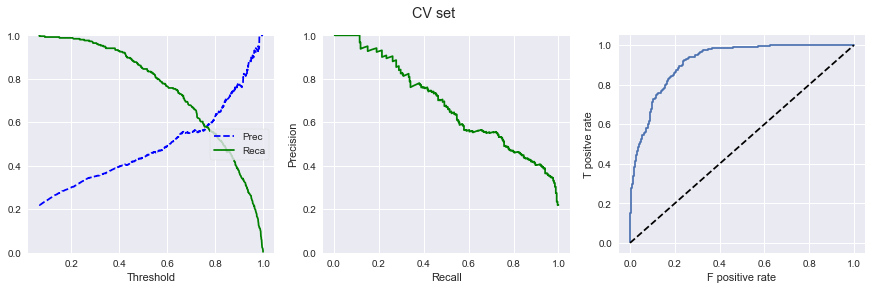

In [126]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression(solver='liblinear',class_weight ='balanced')

grid = {'C':[0.05, 0.1,0.2,0.3,0.5,0.7,1,10]}
#grid = {'C':[0.1]}

grid_search = find_best_model(lgr,grid,X_trainT,y_train,'CV set')
lgr = grid_search.best_estimator_

# grid_search.fit(X_trainT,y_train)
# plot_model_perf(y_test,X_testT,grid_search.best_estimator_,'Test')

CV MODEL RESULTS
{'C': 0.2}
   mean_test_score  mean_train_score
2         0.440527          0.656393
accuracy:  0.81
precision:  0.44
recall:  0.85
auc:  0.83
accuracy:  0.58
precision:  0.27
recall:  0.98
auc:  0.75


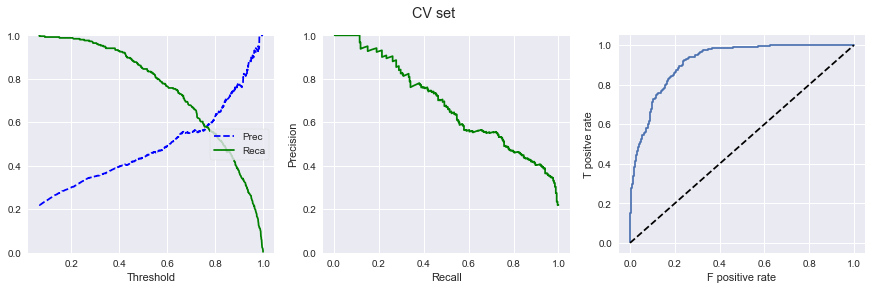

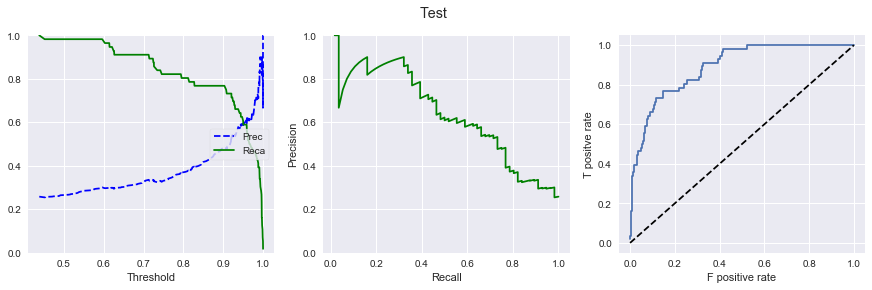

In [127]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression(solver='liblinear',class_weight ='balanced')

grid = {'C':[0.05, 0.1,0.2,0.3,0.5,0.7,1,10]}
#grid = {'C':[0.1]}

grid_search = find_best_model(lgr,grid,X_trainT,y_train,'CV set')
lgr = grid_search.best_estimator_

# grid_search.fit(X_trainT,y_train)
plot_model_perf(y_test,X_testT,grid_search.best_estimator_,'Test')

# Dev

In [48]:
from sklearn.model_selection import TimeSeriesSplit
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([1, 2, 3, 4, 5, 6])
tscv = TimeSeriesSplit(n_splits=5)
print(tscv)  

for train_index, test_index in tscv.split(X):
   print("TRAIN:", train_index, "TEST:", test_index)
   X_train, X_test = X[train_index], X[test_index]
   y_train, y_test = y[train_index], y[test_index]

TimeSeriesSplit(max_train_size=None, n_splits=5)
TRAIN: [0] TEST: [1]
TRAIN: [0 1] TEST: [2]
TRAIN: [0 1 2] TEST: [3]
TRAIN: [0 1 2 3] TEST: [4]
TRAIN: [0 1 2 3 4] TEST: [5]


In [44]:
tscv.split(X)

<generator object TimeSeriesSplit.split at 0x000002407BF86518>

In [50]:
# import xgboost as xgb
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
import numpy as np
X = np.array([[4, 5, 6, 1, 0, 2], [3.1, 3.5, 1.0, 2.1, 8.3, 1.1]]).T
y = np.array([1, 6, 7, 1, 2, 3])
tscv = TimeSeriesSplit(n_splits=2)

# model = xgb.XGBRegressor()
# param_search = {'max_depth' : [3, 5]}
tscv = TimeSeriesSplit(n_splits=2)
my_cv = TimeSeriesSplit(n_splits=2).split(X)
gsearch = GridSearchCV(estimator=model, cv=my_cv,
                        param_grid=param_search)
gsearch.fit(X, y)

NameError: name 'model' is not defined

CV MODEL RESULTS
{'C': 0.7}
   mean_test_score  mean_train_score
5         0.556513          0.590606
accuracy:  0.82
precision:  0.45
recall:  0.84
auc:  0.83


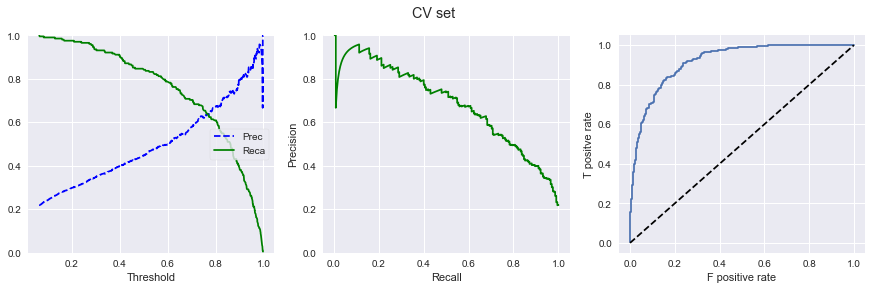

In [37]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression(solver='liblinear',class_weight ='balanced')

grid = {'C':[0.05, 0.1,0.2,0.3,0.5,0.7,1,10]}
#grid = {'C':[0.1]}

grid_search = find_best_model(lgr,grid,X_trainT,y_train,'CV set')
lgr = grid_search.best_estimator_

# grid_search.fit(X_trainT,y_train)
# plot_model_perf(y_test,X_testT,grid_search.best_estimator_,'Test')

CV MODEL RESULTS
{'C': 1}
   mean_test_score  mean_train_score
6         0.552451          0.628499
accuracy:  0.91
precision:  0.77
recall:  0.52
auc:  0.75


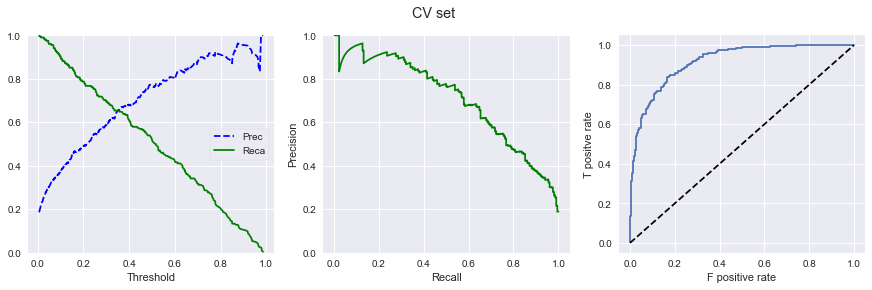

In [38]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression(solver='liblinear',class_weight =None)

grid = {'C':[0.05, 0.1,0.2,0.3,0.5,0.7,1,10]}
#grid = {'C':[0.1]}

grid_search = find_best_model(lgr,grid,X_trainT,y_train,'CV set')
lgr = grid_search.best_estimator_

# grid_search.fit(X_trainT,y_train)
# plot_model_perf(y_test,X_testT,grid_search.best_estimator_,'Test')

CV MODEL RESULTS
{'C': 0.7}
   mean_test_score  mean_train_score
5         0.556513          0.590606
accuracy:  0.82
precision:  0.45
recall:  0.84
auc:  0.83


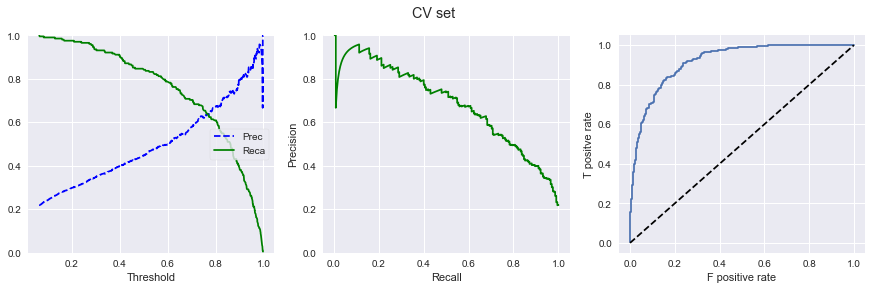

In [39]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression(solver='liblinear',class_weight ='balanced')

grid = {'C':[0.05, 0.1,0.2,0.3,0.5,0.7,1,10]}
#grid = {'C':[0.1]}

grid_search = find_best_model(lgr,grid,X_trainT,y_train,'CV set')
lgr = grid_search.best_estimator_

# grid_search.fit(X_trainT,y_train)
# plot_model_perf(y_test,X_testT,grid_search.best_estimator_,'Test')

## Attempt with kfold set to see if any difference in perf

- using CV seems to get better performance in test set (improvments)

In [72]:
from utils import make_test_train_splits

X_test,X_valid,X_train,X_train_valid,y_test,y_valid,y_train,y_train_valid = make_test_train_splits(df,target_col,'flag_target',365,0)

DATA POINTS:
training:  1733
validation:  0
testing:  365


from sklearn.model_selection import train_test_split

# X = df
# y = df.pop('flag_target')

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)#, random_state=42)

In [74]:
num_pipeline = Pipeline([
    ('selector',DataFrameSelector(num_attribs)),
    ('feature_filter',SelectKBest(f_classif,k='all')),
    ('imputer',Imputer(strategy='median')),
    ('std_scaler',StandardScaler()),
])

cat_pipeline = Pipeline([
    ('selector',DataFrameSelector(cat_attribs)),
    ('imputer',Imputer(strategy='most_frequent')),
    ('OneHot_encoder',OneHotEncoder(sparse=False))
])

bin_pipeline = Pipeline([
    ('selector',DataFrameSelector(bin_attribs)),
    ('imputer',Imputer(strategy='most_frequent')),
    ('boolean_conversion',MakeBooleanAnInteger()),
    #('encoding',LabelEncoder()),
])

full_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline',num_pipeline),
  ('cat_pipeline',cat_pipeline),
 #  ('bin_pipeline',bin_pipeline) 
])

X_trainT = full_pipeline.fit_transform(X_train,y_train)

# X_train_validT = full_pipeline.transform(X_train_valid)
# X_validT = full_pipeline.transform(X_valid)
X_testT = full_pipeline.transform(X_test)

CV MODEL RESULTS
{'C': 0.1}
   mean_test_score  mean_train_score
1         0.526624          0.562775
accuracy:  0.9
precision:  0.75
recall:  0.45
auc:  0.71


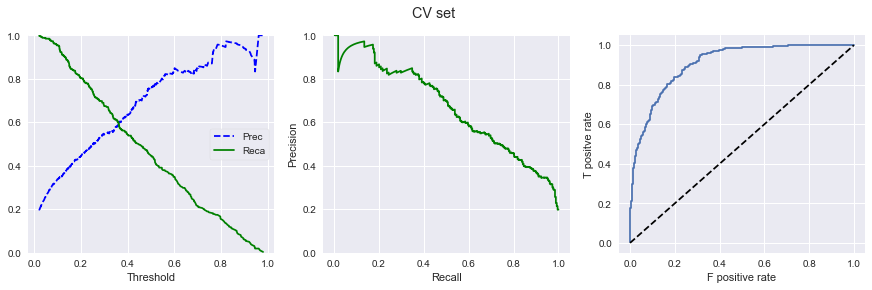

In [75]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression(solver='liblinear',class_weight =None)

grid = {'C':[0.05, 0.1,0.2,0.3,0.5,0.7,1,10]}
#grid = {'C':[0.1]}

grid_search = find_best_model(lgr,grid,X_trainT,y_train,'CV set')
lgr = grid_search.best_estimator_

# grid_search.fit(X_trainT,y_train)
# plot_model_perf(y_test,X_testT,grid_search.best_estimator_,'Test')

CV MODEL RESULTS
{'C': 0.1}
   mean_test_score  mean_train_score
1         0.526624          0.562775
accuracy:  0.9
precision:  0.75
recall:  0.45
auc:  0.71
accuracy:  0.92
precision:  0.78
recall:  0.66
auc:  0.81


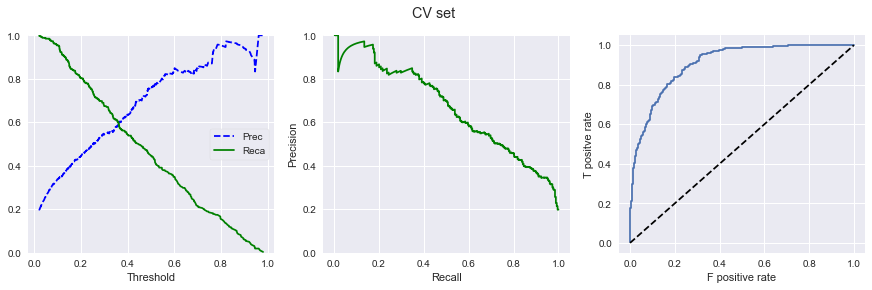

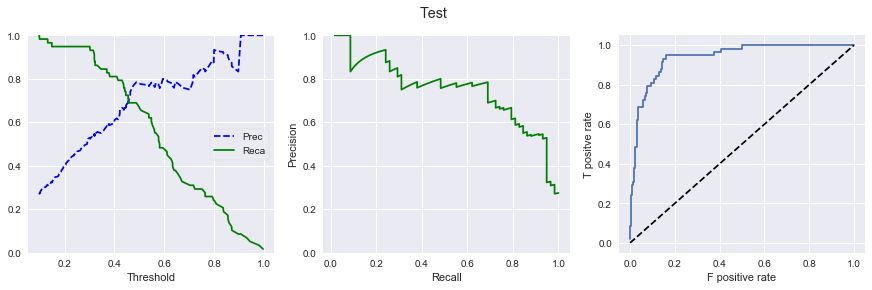

In [77]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression(solver='liblinear',class_weight =None)

grid = {'C':[0.05, 0.1,0.2,0.3,0.5,0.7,1,10]}
#grid = {'C':[0.1]}

grid_search = find_best_model(lgr,grid,X_trainT,y_train,'CV set')
lgr = grid_search.best_estimator_

grid_search.fit(X_trainT,y_train)
plot_model_perf(y_test,X_testT,grid_search.best_estimator_,'Test')

## Using more recent data only

- accuracy and ROC are increasing with more data!

In [101]:
X_trainT[0]

array([-1.38204095, -1.5238513 , -2.57234599,  0.79305209,  0.77604285,
       -1.02523076, -1.37550578, -0.46621314,  0.73983692, -0.80796676,
       -1.88588797, -0.78366605, -1.24548325, -1.29653812,  1.60579135,
       -1.47870446,  1.14686126, -0.45522531, -0.60029134, -0.02956503,
       -1.18703626, -0.36393712, -0.49127564, -0.20864327,  1.96611451,
        1.32252245,  0.79192399, -2.46480462, -1.40561106, -0.80991869,
       -0.45922303,  1.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        1.        ,  0.        ,  0.        ,  0.        ,  0.        ])

In [102]:
X_trainT[1]

array([-1.38204095, -0.56472503, -0.52655269, -0.11173573,  1.88737462,
       -0.13686788, -0.17115923,  0.47225026,  2.28067964,  0.30431652,
       -1.40691042, -1.22560984,  0.34431825, -0.89516253, -0.34952123,
        0.24510365, -0.41195642,  0.44185246, -0.33396447, -0.07322384,
        0.50696712,  0.24753011, -0.15582022, -0.0639781 , -0.48095093,
       -0.11123661, -0.50756454, -0.72866707,  1.13888783, -0.80991869,
       -0.22978198,  1.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  0.        ])

In [132]:
i = 1600 #sample size
X_trainTf = X_trainT[-i:]
y_trainf = y_train[-i:]

In [133]:
X_trainT.shape

(1733, 50)

In [134]:
X_trainTf.shape

(1600, 50)

In [135]:
y_trainf.shape

(1600,)

CV MODEL RESULTS
{'C': 0.2}
   mean_test_score  mean_train_score
2         0.441072          0.547625
accuracy:  0.9
precision:  0.75
recall:  0.4
auc:  0.69
accuracy:  0.91
precision:  0.74
recall:  0.69
auc:  0.82


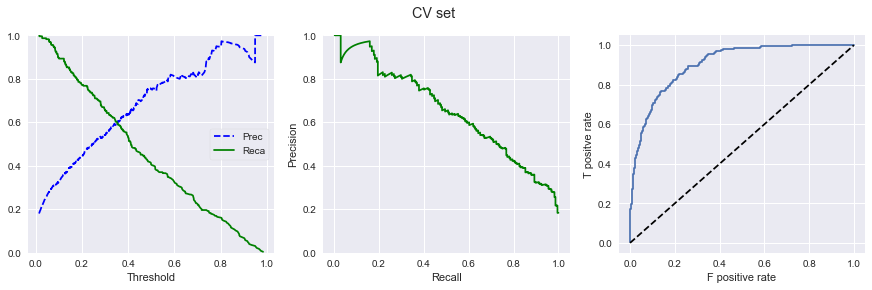

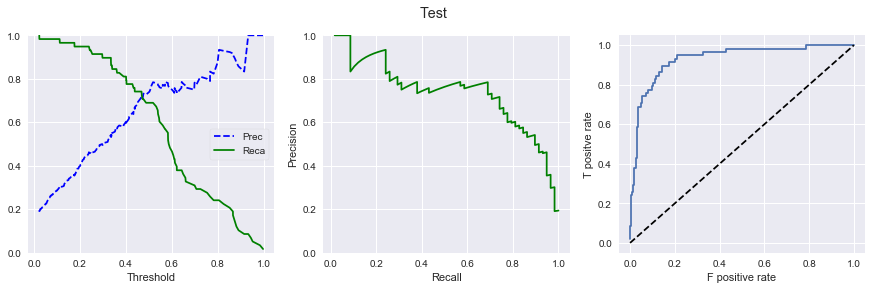

In [136]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression(solver='liblinear',class_weight =None)

grid = {'C':[0.05, 0.1,0.2,0.3,0.5,0.7,1,10]}
#grid = {'C':[0.1]}

grid_search = find_best_model(lgr,grid,X_trainTf,y_trainf,'CV set')
lgr = grid_search.best_estimator_

grid_search.fit(X_trainTf,y_trainf)
plot_model_perf(y_test,X_testT,grid_search.best_estimator_,'Test')

In [ ]:
from utils import DataFrameRebuild

In [ ]:
break

In [ ]:
cols_list = DataFrameRebuild(X_train,X_trainT,num_attribs=num_attribs,bin_attribs=bin_attribs).columns

In [ ]:
lgr.coef_

In [ ]:
cols_list.shape

In [ ]:
pd.DataFrame(index=cols_list,data=lgr.coef_)

In [ ]:
plot_model_perf(y_valid,X_validT,lgr,'Valid')

In [ ]:
plot_model_perf(y_test,X_testT,lgr,'Test')

coefs = pd.DataFrame(data=lgr.coef_.reshape(-1,1),index=X_trainT.columns,columns=['coef'])
coefs = (np.sqrt(coefs**2)).sort_values(by='coef')
list(coefs[coefs.coef < 0.15].index)

coefs[coefs.coef < 0.15].shape

plot_model_perf(y_test,X_testT,lgr,'Test')

In [ ]:
import sklearn
sklearn.metrics.SCORERS.keys()

In [ ]:

lasso = LogisticRegression(penalty = 'l1', solver='liblinear',class_weight ='balanced')

grid = {'C':[0.2,1]}


grid_search = find_best_model(lasso,grid,X_trainT,y_train,'CV set')
lasso = grid_search.best_estimator_

#grid_search.fit(X_trainT,y_train)
#plot_model_perf(y_test,X_testT,grid_search.best_estimator_,'Test')

In [ ]:
from sklearn.linear_model import RidgeClassifier
ridge = RidgeClassifier(class_weight ='balanced')

grid = {'alpha':[0.2,0.3,0.5,1,5,10,30,50,70,100,1000,2000,5000]}


grid_search = find_best_model(ridge,grid,X_trainT,y_train,'CV set')
ridge = grid_search.best_estimator_

#grid_search.fit(X_trainT,y_train)
#plot_model_perf(y_test,X_testT,grid_search.best_estimator_,'Test')

plot_model_perf(y_test,X_testT,grid_search.best_estimator_,'Test')

In [ ]:
#grid_search.fit(X_trainT,y_train)
plot_model_perf(y_test,X_testT,grid_search.best_estimator_,'Test')

In [ ]:
break

### SVM

In [ ]:
from sklearn.svm import SVC

svc = SVC(class_weight ='balanced',kernel='rbf',probability=True)

grid = {'C':[0.5,1,5,50,70,1000],
       'gamma':['auto']}


grid_search = find_best_model(svc,grid,X_trainT,y_train,'CV set')
svc = grid_search.best_estimator_


#grid_search.fit(X_trainT,y_train)
#plot_model_perf(y_test,X_testT,grid_search.best_estimator_,'Test')

In [ ]:
#grid_search.fit(X_trainT,y_train)
plot_model_perf(y_test,X_testT,svc,'Test')

In [ ]:
from sklearn.svm import SVC

svc = SVC(class_weight ='balanced',kernel='rbf',probability=True)

grid = {'C':[0.5,1,5,50,70,1000],
       'gamma':['auto']}


grid_search = find_best_model(svc,grid,X_trainT,y_train,'CV set')
svc = grid_search.best_estimator_

#grid_search.fit(X_trainT,y_train)
#plot_model_perf(y_test,X_testT,grid_search.best_estimator_,'Test')

In [ ]:
from sklearn.svm import SVC

svc_lin = SVC(class_weight ='balanced',kernel='linear',probability=True)

grid = {'C':[0.2,0.5,1,5],
       'gamma':['auto']}


grid_search = find_best_model(svc_lin,grid,X_trainT,y_train,'CV set')
svc_lin = grid_search.best_estimator_

#grid_search.fit(X_trainT,y_train)
#plot_model_perf(y_test,X_testT,grid_search.best_estimator_,'Test')

In [ ]:
from sklearn.svm import SVC

svc_lin = SVC(class_weight ='balanced',kernel='linear',probability=True)

grid = {'C':[0.2,0.5,1,5],
       'gamma':['auto']}


grid_search = find_best_model(svc_lin,grid,X_trainT,y_train,'CV set')
svc_lin = grid_search.best_estimator_

#grid_search.fit(X_trainT,y_train)
#plot_model_perf(y_test,X_testT,grid_search.best_estimator_,'Test')

In [ ]:
plot_model_perf(y_test,X_testT,svc_lin,'Test')

### Bagging

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier



bag_clf = BaggingClassifier(
        RidgeClassifier(class_weight='balanced'),n_jobs=-1
    )


grid = {"bootstrap" : ["True"],
              "base_estimator__alpha": [0.2,0.3,0.5,1,5]
             }


grid_search = find_best_model(bag_clf,grid,X_trainT,y_train,'CV set')
bag_clf = grid_search.best_estimator_

#grid_search.fit(X_trainT,y_train)
#plot_model_perf(y_test,X_testT,grid_search.best_estimator_,'Test')

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier



bag_clf = BaggingClassifier(
        DecisionTreeClassifier(class_weight='balanced'),bootstrap=True,n_jobs=-1
    )


grid = {"bootstrap" : ["True"],
        "n_estimators":[10,50,100],
              "base_estimator__max_depth": [3],
        "base_estimator__splitter":['random']
             }


grid_search = find_best_model(bag_clf,grid,X_trainT,y_train,'CV set')
bag_clf = grid_search.best_estimator_

#grid_search.fit(X_trainT,y_train)
#plot_model_perf(y_test,X_testT,grid_search.best_estimator_,'Test')

In [ ]:
plot_model_perf(y_test,X_testT,bag_clf,'Test')

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier



bag_clf2 = BaggingClassifier(
        DecisionTreeClassifier(class_weight='balanced'),bootstrap=True,n_jobs=-1
    )


grid = {"bootstrap" : ["True"],
        "n_estimators":[10,50,100],
              "base_estimator__max_depth": [3],
        "max_samples": [150],
        "base_estimator__splitter":['random']
             }


grid_search = find_best_model(bag_clf2,grid,X_trainT,y_train,'CV set')
bag_clf2 = grid_search.best_estimator_

#grid_search.fit(X_trainT,y_train)
#plot_model_perf(y_test,X_testT,grid_search.best_estimator_,'Test')

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier



bag_clf2 = BaggingClassifier(
        DecisionTreeClassifier(class_weight='balanced'),bootstrap=True,n_jobs=-1
    )


grid = {"bootstrap" : ["True", "False"],
        "n_estimators":[10,50,100,200,400,600,800],
              "base_estimator__max_depth": [2],
        "max_samples": [50,150,250],
        "base_estimator__splitter":['random']
             }


grid_search = find_best_model(bag_clf2,grid,X_trainT,y_train,'CV set')
bag_clf2 = grid_search.best_estimator_

#grid_search.fit(X_trainT,y_train)
#plot_model_perf(y_test,X_testT,grid_search.best_estimator_,'Test')

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier



bag_clf3 = BaggingClassifier(
        DecisionTreeClassifier(class_weight='balanced'),bootstrap=True,n_jobs=-1
    )


grid = {"bootstrap" : ["True"],
        "n_estimators":[1000],
              "base_estimator__max_depth": [1,2],
        "max_samples": [10,20,30,50],
        "base_estimator__splitter":['random']
             }


grid_search = find_best_model(bag_clf3,grid,X_trainT,y_train,'CV set')
bag_clf3 = grid_search.best_estimator_

#grid_search.fit(X_trainT,y_train)
#plot_model_perf(y_test,X_testT,grid_search.best_estimator_,'Test')

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier



bag_clf2 = BaggingClassifier(
        DecisionTreeClassifier(class_weight='balanced'),bootstrap=True,n_jobs=-1
    )


grid = {"bootstrap" : ["True", "False"],
        "n_estimators":[1000],
              "base_estimator__max_depth": [1,2],
        "max_samples": [10,20,30,50],
        "base_estimator__splitter":['random']
             }


grid_search = find_best_model(bag_clf2,grid,X_trainT,y_train,'CV set')
bag_clf2 = grid_search.best_estimator_

#grid_search.fit(X_trainT,y_train)
#plot_model_perf(y_test,X_testT,grid_search.best_estimator_,'Test')

## test ensemble

In [ ]:
from civismlext.stacking import StackedClassifier

rng = np.random.RandomState(17)
est_list = [
    ('lgr',lgr),
    ('svm_linear',svc_lin),
    ('bag',bag_clf),
    ('metalr',LogisticRegression(penalty = 'l1', solver='liblinear',class_weight='balanced'))
]

In [ ]:
sm = StackedClassifier(est_list,n_jobs=2,cv=5)

In [ ]:
sm.fit(X_train_validT, y_train_valid)

In [ ]:
X_validT = full_pipeline.transform(X_valid)

In [ ]:
X_train_validT = full_pipeline.transform(X_train_valid)

In [ ]:
sm.meta_estimator.coef_

In [ ]:
plot_model_perf(y_train,X_trainT,sm,'train')

In [ ]:
plot_model_perf(y_valid,X_validT,sm,'valid')

In [ ]:
plot_model_perf(y_test,X_testT,sm,'test')

In [ ]:
plot_model_perf(y_test,X_testT,sm,'test')

NOtes:
    - made little differnece having the extra validation data for training

In [ ]:
param_grid = {
    'metalr__C': [0.5,1]
}

grid = GridSearchCV(sm,param_grid,scoring='roc_auc',cv=5)

In [ ]:
grid.fit(X_train_validT,y_train_valid)

In [ ]:
plot_model_perf(y_train_valid,X_train_validT,grid.best_estimator_,'train')

In [ ]:
plot_model_perf(y_test,X_testT,grid.best_estimator_,'test')

In [ ]:
grid.best_estimator_.get_params()

In [ ]:
sm.meta_estimator

In [ ]:
grid.best_estimator_.meta_estimator.coef_

In [ ]:
sm.meta_estimator.

#### more complex meta estimator

In [ ]:
from civismlext.stacking import StackedClassifier
from sklearn.svm import SVC

rng = np.random.RandomState(17)
est_list = [
    ('lgr',lgr),
    ('svm_linear',svc_lin),
    ('bag',bag_clf),
    ('metalr',SVC(kernel='linear',class_weight='balanced'))
]

In [ ]:
sm = StackedClassifier(est_list,n_jobs=-1,cv=5)

In [ ]:
param_grid = {
    'metalr__C': [0.5,1,5]
}

grid = GridSearchCV(sm,param_grid,scoring='roc_auc',cv=5)

In [ ]:
grid.fit(X_train_validT, y_train_valid)

In [ ]:
grid.best_estimator_.meta_estimator.coef_

In [ ]:
plot_model_perf(y_train_valid,X_train_validT,grid.best_estimator_,'train')

In [ ]:
plot_model_perf(y_test,X_testT,grid.best_estimator_,'test')

# Dev

In [ ]:
break

# Analayse errors

In [ ]:
estimator_list = [('lgr',lgr),('lasso',lasso),('SVM',svc),('SVM_lin',svc_lin),('bag1',bag_clf),('bag2',bag_clf2),('vote',voting_clf)]

pred_results = pd.DataFrame(data = y_train.values, index=X_train.index, columns=['y_test'])

for name,model in estimator_list:
    print(name)
    y_train_pred = cross_val_predict(model,X_trainT,y_train,cv=5,n_jobs=-1,method='predict_proba')[:,1]
    y_train_pred = pd.DataFrame(y_train_pred, index = X_train.index, columns=['y_pred_' + name])
    pred_results = pred_results.merge(y_train_pred,right_index=True,left_index=True) # merge model results
    
    
pred_results = pred_results.merge(X_train,right_index=True,left_index=True) # merge 

In [ ]:
pred_results.head()

pred_cols = ['y_test','y_pred_lgr','y_pred_lasso','y_pred_SVM','y_pred_SVM_lin','y_pred_bag1','y_pred_bag2','y_pred_vote']

In [ ]:
pred_cols = {'y_test':0.5,'y_pred_lgr':0.9,'y_pred_lasso':0.9,'y_pred_SVM_lin':0.6,'y_pred_bag1':0.75,
             'y_pred_bag2':0.5,'y_pred_vote':0.65}

In [ ]:
pred_cols

In [ ]:
for name in pred_cols:
    col =  name # 'y_pred_' +
    print([name])
    thresh = pred_cols[name]
    print(pred_results[pred_results[name] > thresh][col].count())
    pred_results[name + '_CLASS'] = pred_results[pred_results[name] > thresh][name].astype('bool').astype('int')

In [ ]:
pred_results.groupby('y_test').sum()

In [ ]:
missed = pred_results.query('y_test == 1')[['y_pred_lgr_CLASS','y_pred_lasso_CLASS',
                                  'y_pred_SVM_lin_CLASS','y_pred_bag1_CLASS','y_pred_bag2_CLASS','y_pred_vote_CLASS']].isnull().sum(axis=1)

In [ ]:
pred_results.query('y_test == 1')[['y_pred_lgr_CLASS','y_pred_lasso_CLASS',
                                  'y_pred_SVM_lin_CLASS','y_pred_bag1_CLASS','y_pred_bag2_CLASS','y_pred_vote_CLASS']].isnull().sum(axis=1).value_counts()

In [ ]:
missed.head(10)

In [ ]:
missed = missed[missed == 6]

In [ ]:
missed.head()

In [ ]:
pred_results['y_pred_MISSED'] = 0
pred_results.loc[missed.index,'y_pred_MISSED'] = 1

In [ ]:
pred_results.y_pred_MISSED.sum()

In [ ]:
X_train.head()

In [ ]:
pred_results['y_pred_MISSED'].sum()

In [ ]:
pred_results['flag_prediction'].sum()

In [ ]:
pred_col = 'y_pred_MISSED'
pred_results[pred_col + '_lag1'] = pred_results[pred_col].shift(1)

fig2, ax = plt.subplots(figsize=(18,6))
pred_results.plot(x="dt_date", y=target_col, ax=ax, label="validate",style='g')
pred_results[pred_results[pred_col + '_lag1'] == 1].plot(x='dt_date',y=target_col,ax=ax,style='ob')
pred_results[pred_results['flag_prediction'] == 1].plot(x='dt_date',y=target_col,ax=ax,style='.k')

plt.legend(loc='upper left')


In [ ]:
correct_col = 'y_test'
pred_col = 'y_pred_' + 'SVM_lin' + '_CLASS'
fig2, ax = plt.subplots(figsize=(18,6))
pred_results.plot(x="dt_date", y=target_col, ax=ax, label="validate",style='g')
pred_results[pred_results[pred_col] == 1].plot(x='dt_date',y=target_col,ax=ax,style='or')
pred_results[pred_results['flag_prediction'] == 1].plot(x='dt_date',y=target_col,ax=ax,style='.k')

plt.legend(loc='upper left')


In [ ]:
correct_col = 'y_test'
pred_col = 'y_pred_' + 'lgr' + '_CLASS'
fig2, ax = plt.subplots(figsize=(18,6))

pred_results.plot(x="dt_date", y=target_col, ax=ax, label="validate",style='g')
pred_results[pred_results[pred_col] == 1].plot(x='dt_date',y=target_col,ax=ax,style='or')
pred_results[pred_results['flag_prediction'] == 1].plot(x='dt_date',y=target_col,ax=ax,style='.k')
plt.legend(loc='upper left')


In [ ]:
correct_col = 'y_test'
pred_col = 'y_pred_' + 'bag1' + '_CLASS'
fig2, ax = plt.subplots(figsize=(18,6))

pred_results.plot(x="dt_date", y=target_col, ax=ax, label="validate",style='g')
pred_results[pred_results[pred_col] == 1].plot(x='dt_date',y=target_col,ax=ax,style='or')
pred_results[pred_results['flag_prediction'] == 1].plot(x='dt_date',y=target_col,ax=ax,style='.k')
plt.legend(loc='upper left')


In [ ]:
correct_col = 'y_test'
pred_col = 'y_pred_' + 'bag2' + '_CLASS'
fig2, ax = plt.subplots(figsize=(18,6))

pred_results.plot(x="dt_date", y=target_col, ax=ax, label="validate",style='g')
pred_results[pred_results[pred_col] == 1].plot(x='dt_date',y=target_col,ax=ax,style='or')
pred_results[pred_results['flag_prediction'] == 1].plot(x='dt_date',y=target_col,ax=ax,style='.k')
plt.legend(loc='upper left')


In [ ]:
correct_col = 'y_test'
pred_col = 'y_pred_' + 'vote' + '_CLASS'
fig2, ax = plt.subplots(figsize=(18,6))

pred_results.plot(x="dt_date", y=target_col, ax=ax, label="validate",style='g')
pred_results[pred_results[pred_col] == 1].plot(x='dt_date',y=target_col,ax=ax,style='or')
pred_results[pred_results['flag_prediction'] == 1].plot(x='dt_date',y=target_col,ax=ax,style='.k')
plt.legend(loc='upper left')


In [ ]:
correct_col = 'y_test'
pred_col = 'y_pred_' + 'vote'


fig2, ax = plt.subplots(figsize=(18,6))
#### plot lines
#X_train.plot(x="dt_date", y=target_col, ax=ax, label="train")
pred_results.plot(x="dt_date", y=target_col, ax=ax, label="validate",style='g')
#X_test.plot(x="dt_date", y=target_col, ax=ax, label="test")


pred_results[pred_results[pred_col] == 1].plot(x='dt_date',y=target_col,ax=ax,style='or')
pred_results[pred_results['flag_prediction'] == 1].plot(x='dt_date',y=target_col,ax=ax,style='.k')
#plt.axvline(pd.to_datetime(str(df.loc[validate_range].period.values[0])), c='green', ls='--', lw=1)
# plt.axvline(pd.to_datetime(str(df.loc[test_range].period.values[0])), c='red', ls='--', lw=1)
plt.legend(loc='upper left')

# plt.savefig('images/svm-split.png');

In [ ]:
correct_col = 'y_test'
pred_col = 'y_pred_' + 'bag2'


fig2, ax = plt.subplots(figsize=(18,6))
#### plot lines
#X_train.plot(x="dt_date", y=target_col, ax=ax, label="train")
pred_results.plot(x="dt_date", y=target_col, ax=ax, label="validate",style='g')
#X_test.plot(x="dt_date", y=target_col, ax=ax, label="test")


pred_results[pred_results[pred_col] == 1].plot(x='dt_date',y=target_col,ax=ax,style='or')
pred_results[pred_results['flag_prediction'] == 1].plot(x='dt_date',y=target_col,ax=ax,style='.k')
#plt.axvline(pd.to_datetime(str(df.loc[validate_range].period.values[0])), c='green', ls='--', lw=1)
# plt.axvline(pd.to_datetime(str(df.loc[test_range].period.values[0])), c='red', ls='--', lw=1)
plt.legend(loc='upper left')

# plt.savefig('images/svm-split.png');

In [ ]:
correct_col = 'y_test'
pred_col = 'y_pred_' + 'bag1'


fig2, ax = plt.subplots(figsize=(18,6))
#### plot lines
#X_train.plot(x="dt_date", y=target_col, ax=ax, label="train")
pred_results.plot(x="dt_date", y=target_col, ax=ax, label="validate",style='g')
#X_test.plot(x="dt_date", y=target_col, ax=ax, label="test")


pred_results[pred_results[pred_col] == 1].plot(x='dt_date',y=target_col,ax=ax,style='or')
pred_results[pred_results['flag_prediction'] == 1].plot(x='dt_date',y=target_col,ax=ax,style='.k')
#plt.axvline(pd.to_datetime(str(df.loc[validate_range].period.values[0])), c='green', ls='--', lw=1)
# plt.axvline(pd.to_datetime(str(df.loc[test_range].period.values[0])), c='red', ls='--', lw=1)
plt.legend(loc='upper left')

# plt.savefig('images/svm-split.png');